In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
rf = pd.read_csv("chennai_reservoir_levels.csv")
rl = pd.read_csv("chennai_reservoir_rainfall.csv")

In [6]:
rf.head(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [7]:
rl.head(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [9]:
import datetime

rf['Date'] = pd.to_datetime(rf['Date'], format = "%d-%m-%Y")
rl['Date'] = pd.to_datetime(rl['Date'], format = "%d-%m-%Y")

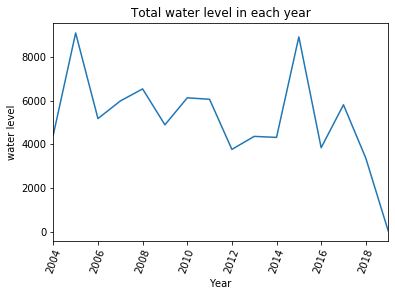

In [15]:
#Total water level in each year

rl['Year'] = rl['Date'].dt.year
rl['Month'] = rl['Date'].dt.month
rl['Total'] = rl['POONDI']+rl['REDHILLS']+rl['CHEMBARAMBAKKAM']+rl['CHOLAVARAM']
grp_by_year = rl.groupby('Year')['Total'].sum()
grp_by_year.plot(kind='line');
plt.title('Total water level in each year')
plt.ylabel('water level');
plt.xticks(rotation=70);

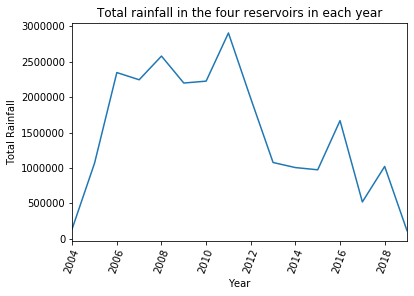

In [17]:
#Total rainfall in the four reservoirs in each year

rf['Year'] = rf['Date'].dt.year
rf['Month'] = rf['Date'].dt.month
rf['Total'] = rf['POONDI']+rf['REDHILLS']+rf['CHEMBARAMBAKKAM']+rf['CHOLAVARAM']
grp_by_year = rf.groupby('Year')['Total'].sum()
grp_by_year.plot(kind='line');
plt.title('Total rainfall in the four reservoirs in each year')
plt.ylabel('Total Rainfall');
plt.xticks(rotation=70);

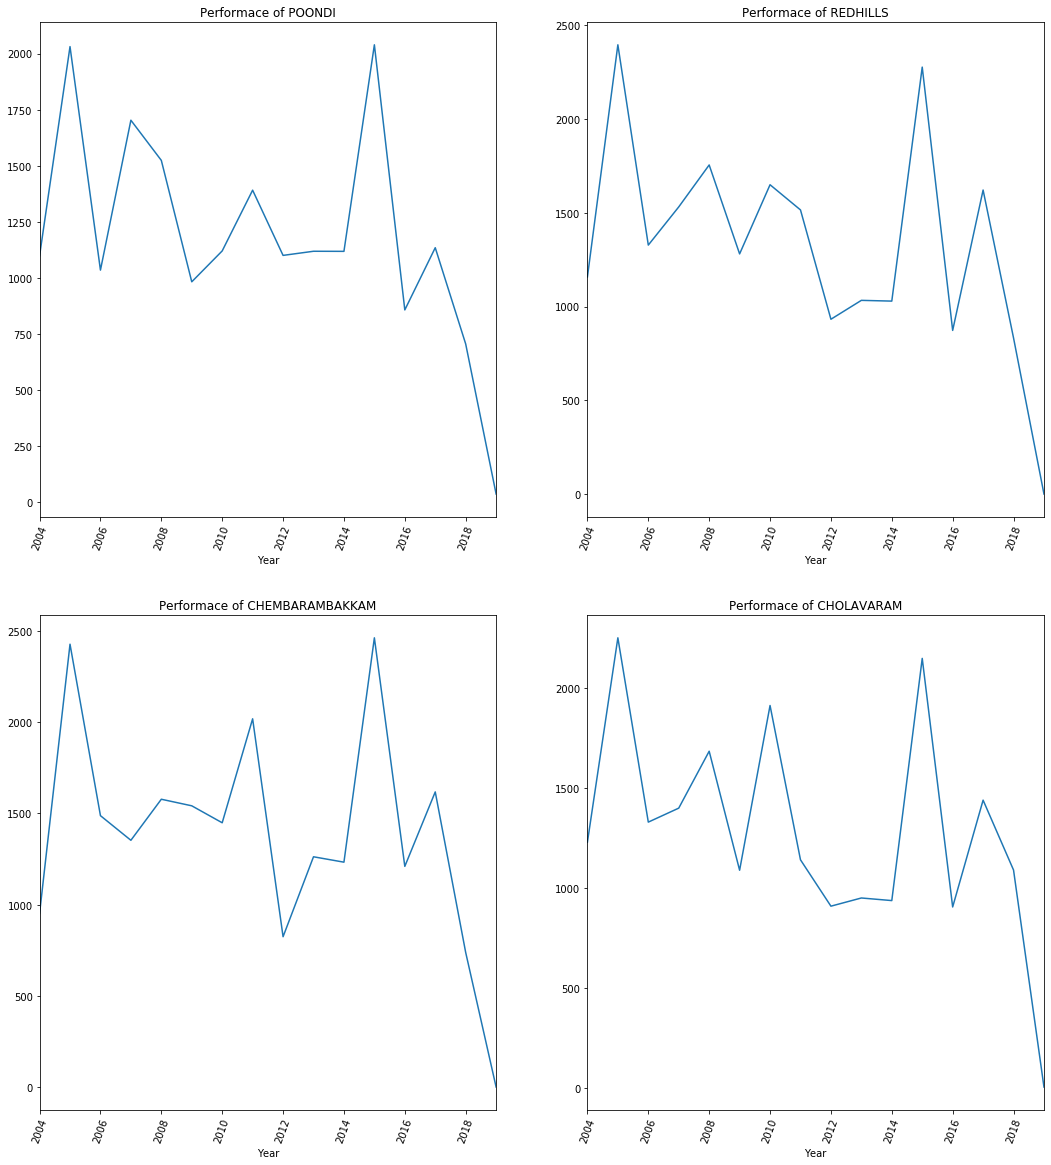

In [28]:
plt.figure(figsize=(18,20))

reservoirs = ['POONDI', 'REDHILLS', 'CHEMBARAMBAKKAM', 'CHOLAVARAM']
count = 1

for reservoir in reservoirs:
    x = rl.loc[:,[reservoir,'Year','Total']]
    plt.subplot(2,2,count)
    y = x.groupby('Year')[reservoir].sum()
    y.plot(kind = 'line');
    plt.xticks(rotation = 70)
    plt.title("Performace of " + reservoir)
    count = count+1


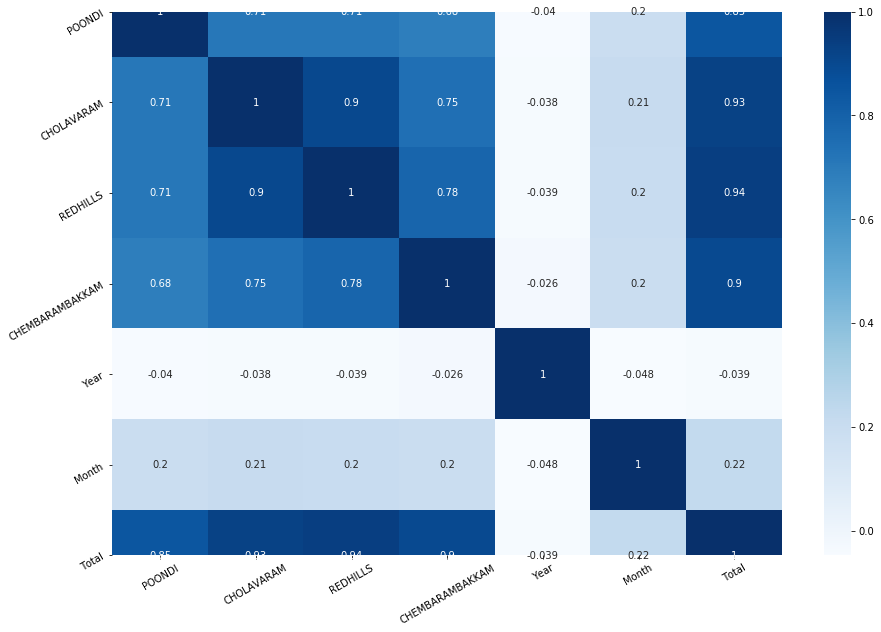

In [33]:
plt.figure(figsize=(15,10))
cor = rl.corr()
sns.heatmap(cor,cmap="Blues",annot=True);
plt.yticks(rotation=30);
plt.xticks(rotation=30);

In [34]:
average_rainfall = rf['Total'].sum()/len(rf.index) # this is equivalent to df_rainfall['Total'].mean()
print('Average Rainfall over the Years: {}'.format(average_rainfall))
average_water_levels = rl['Total'].sum()/len(rl.index) # this is equivalent to df_rainfall['Total'].mean()
print('Average Water Level over the Years: {}'.format(average_water_levels))

Average Rainfall over the Years: 4263.019992916593
Average Water Level over the Years: 14.662387108199043
